<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#加载数据" data-toc-modified-id="加载数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>加载数据</a></span></li><li><span><a href="#检测结果比较" data-toc-modified-id="检测结果比较-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>检测结果比较</a></span></li></ul></div>

In [1]:
%matplotlib inline
dataset = '02_prasad'
propose_path = f'/home/liucc/Workspace/02_Ellipse/03_results/{dataset}/05_ellipse_result/proposed/'
high_path = f'/home/liucc/Workspace/02_Ellipse/03_results/{dataset}/05_ellipse_result/2018_high/'
label_path = f'/home/liucc/Workspace/02_Ellipse/03_results/{dataset}/04_ellipse_label/'
raw_path = f'/home/liucc/Workspace/02_Ellipse/03_results/{dataset}/01_raw/'

In [2]:
import os 
fnames = os.listdir(label_path)
fnames = [n[:-4] for n in fnames if n[-3:]=='txt']
fnames.sort()
print(fnames[:10])

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


# 加载数据

In [3]:
gts = []
pps = []
hps = []

for name in fnames:
    nameg = label_path+name+'.txt'
    namep = propose_path+name+'.txt'
    nameh = high_path+name+'.txt'
    
    with open(nameg,'r') as f:
        txt = f.read()
        
        ells_t = [[float(v) for v in l.split(' ')] for l in txt.split('\n') if len(l)>0]
        
        gts.append(ells_t)
        
    with open(namep,'r') as f:
        txt = f.read()
        
        ells_t = [[float(v) for v in l.split(' ')] for l in txt.split('\n') if len(l)>0]
        
        pps.append(ells_t)
        
    with open(nameh,'r') as f:
        txt = f.read()
        
        ells_t = [[float(v) for v in l.split(' ')] for l in txt.split('\n') if len(l)>0]
        
        hps.append(ells_t)
        

print(len(gts),len(pps),len(hps))

198 198 198


In [15]:
import sys
sys.path.append('/home/liucc/Workspace/02_Ellipse/01_data')
from cc_process_image import *

raws = get_all_images(f'{raw_path}',fnames,'jpg',itype='gray')

print(len(raws))

/home/liucc/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/liucc/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


198


# 检测结果比较

In [17]:
import sys
sys.path.append('../')
from experiment import *
sys.path.append('/home/liucc/Workspace/02_Ellipse/02_algorithm/02_ellipse_detect')
from cc_ellipse_v2 import *

In [7]:
F1s = [] 
for _id,(gt,pp,hp) in enumerate(zip(gts,pps,hps)):
    _,_,F1,_,_ = cal_metrics([pp],[gt],threshold=0.8)
    _,_,F2,_,_ = cal_metrics([hp],[gt],threshold=0.8)
    
    if F1>F2:
        F1s.append((_id,F2-F1))
    

In [8]:
F1ss = sorted(F1s, key=lambda x:x[1],reverse=False)

In [9]:
len(F1ss)

59

In [21]:
[i for i,_ in F1ss[10:20]]

[145, 14, 59, 135, 150, 195, 34, 92, 133, 31]

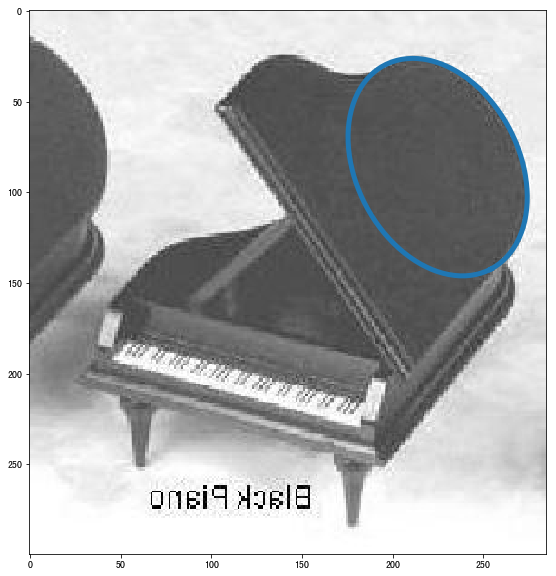

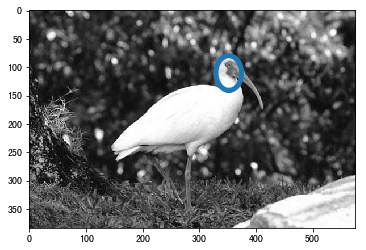

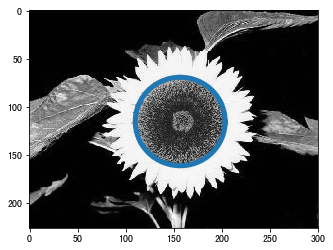

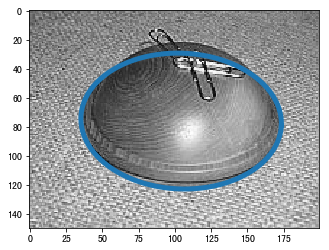

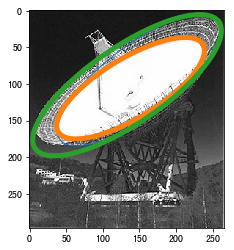

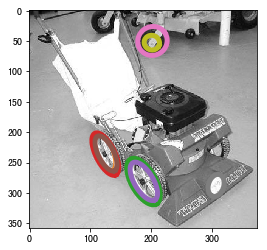

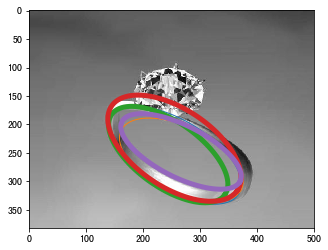

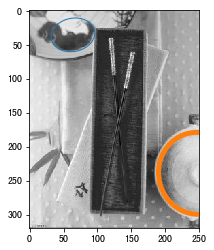

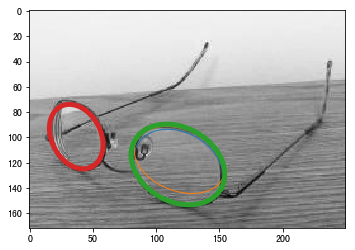

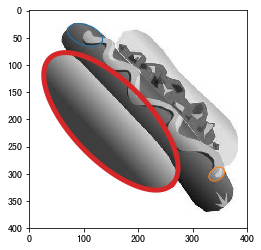

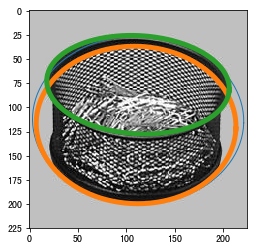

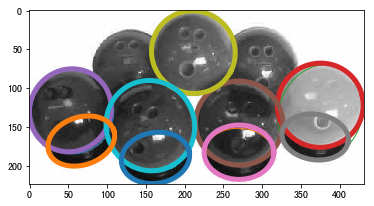

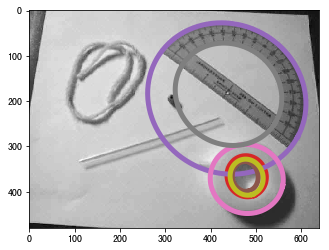

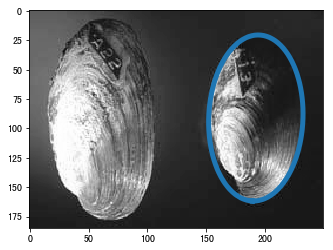

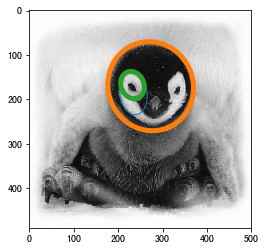

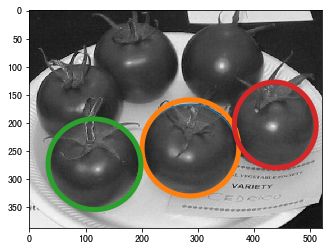

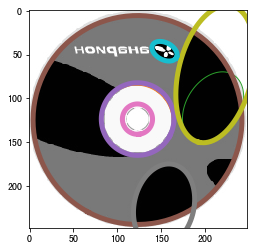

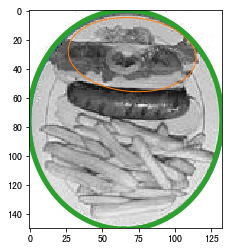

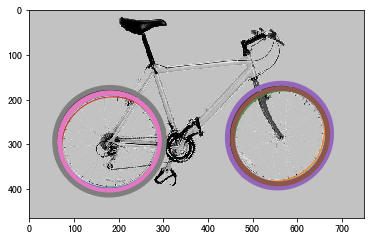

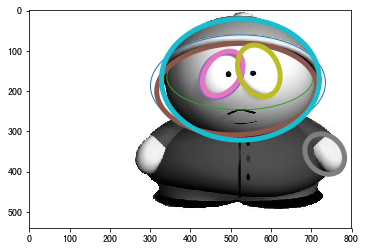

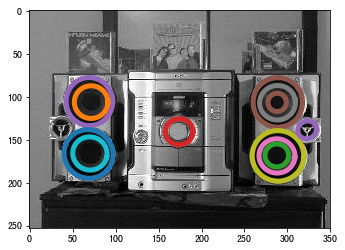

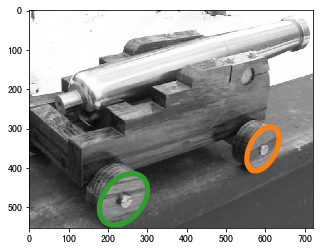

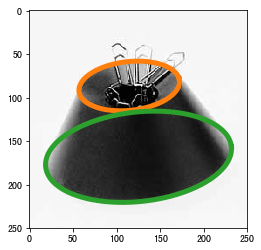

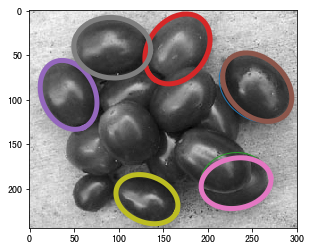

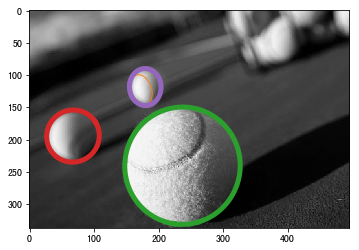

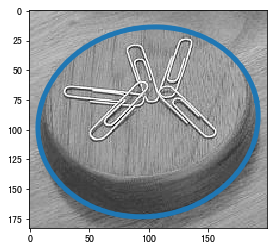

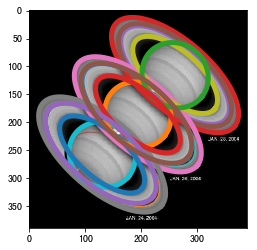

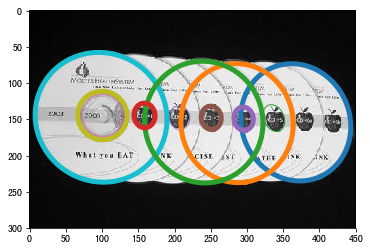

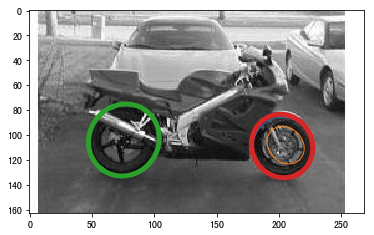

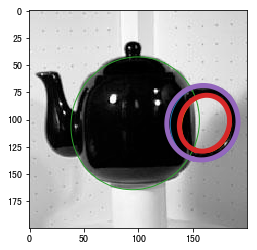

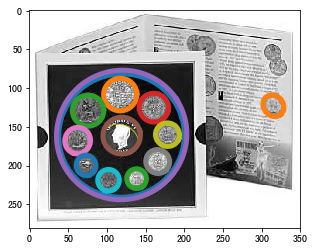

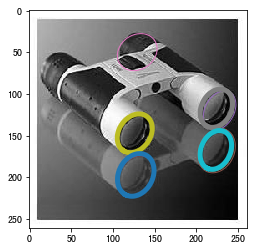

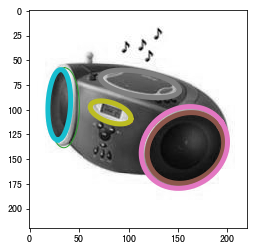

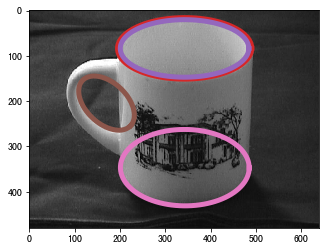

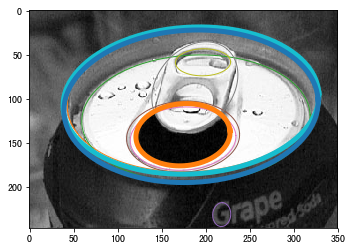

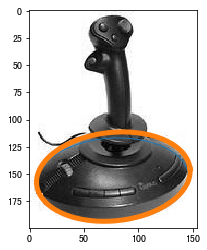

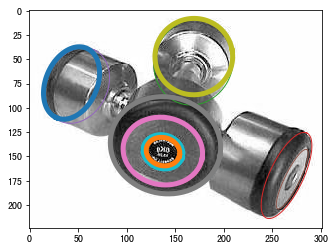

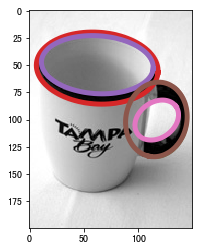

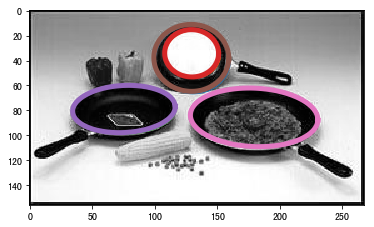

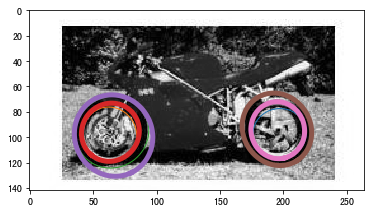

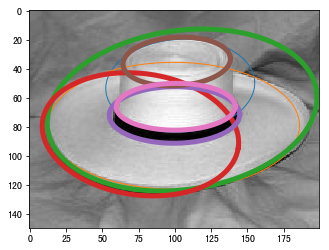

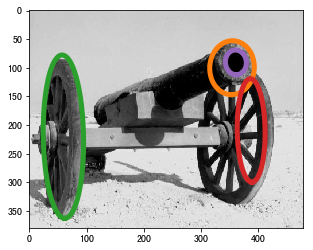

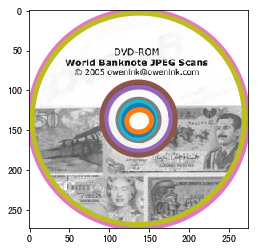

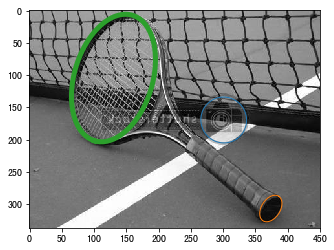

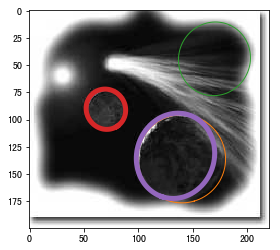

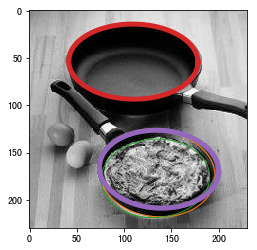

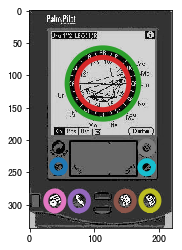

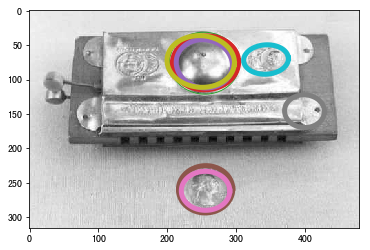

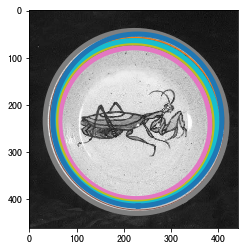

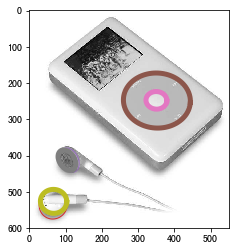

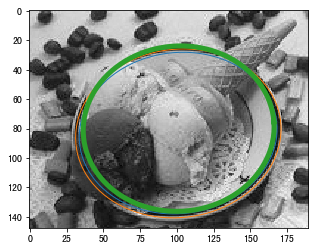

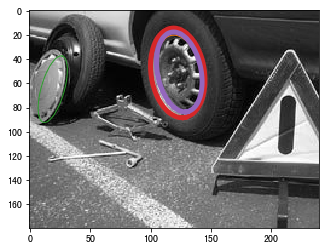

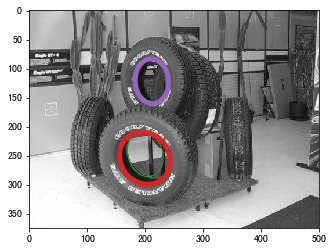

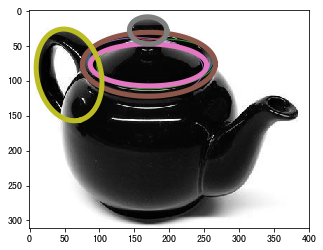

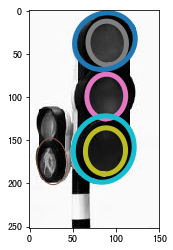

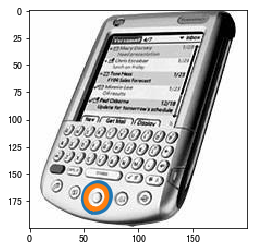

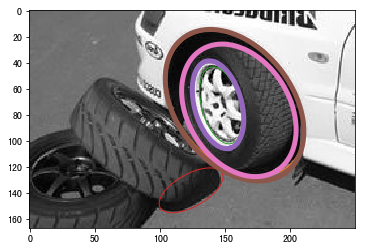

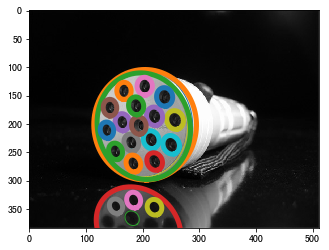

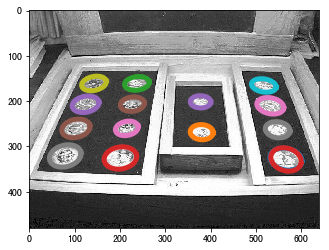

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i,(_id,_) in enumerate(F1ss):
    gt = gts[_id]
    pr = pps[_id]
    hp = hps[_id]
    im = raws[_id]
    
    for ell in hp:
        exy = draw_ellipse(*ell)
        plt.plot(exy[0,:],exy[1,:],linewidth='1')
        
        
    for ell in pr:
        exy = draw_ellipse(*ell)
        plt.plot(exy[0,:],exy[1,:],linewidth='5')
        
    plt.imshow(im,cmap='gray')
    id1 = "%03d"%i
    plt.savefig(f'01_bad_detections/{id1}_{_id}.jpg')
    plt.show()
    
    #break